<a href="https://colab.research.google.com/github/hajar2004hamine/Data-science/blob/main/HAMINE_Hajar_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# To get the online help, you can use the help() function in Python:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

Now that we've seen the help documentation, let's instantiate and train a `KNeighborsClassifier` model with the `X` (features) and `y` (target) data we loaded previously.

The model has been trained! Now you can use it to make predictions on new data.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Drop the 'color' column from Xa as it is non-numeric
Xa_numeric = Xa.drop('color', axis=1, errors='ignore')

# Fit the model on (Xa_numeric, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa_numeric, Ya)

KNeighborsClassifier(n_neighbors=3)

In [24]:
from sklearn.preprocessing import StandardScaler

# Drop the 'color' column from Xa and Xv as it is non-numeric
Xa_numeric = Xa.drop('color', axis=1, errors='ignore')
Xv_numeric = Xv.drop('color', axis=1, errors='ignore')

# Initialize StandardScaler with mean and standard deviation scaling
sc = StandardScaler(with_mean=True, with_std=True)

# Fit the scaler on the training data (Xa_numeric) to learn the mean and standard deviation
sc = sc.fit(Xa_numeric)

# Transform both training and validation data using the fitted scaler
Xa_n = sc.transform(Xa_numeric)
Xv_n = sc.transform(Xv_numeric)

print("Features scaled successfully!")
print(f"Shape of scaled training features (Xa_n): {Xa_n.shape}")
print(f"Shape of scaled validation features (Xv_n): {Xv_n.shape}")
print(f"First 5 rows of scaled training features:\n{Xa_n[:5]}")

Features scaled successfully!
Shape of scaled training features (Xa_n): (1632, 11)
Shape of scaled validation features (Xv_n): (1633, 11)
First 5 rows of scaled training features:
[[-0.78628837 -0.08240361  1.14074846 -1.01511805  5.22869591 -0.39738252
  -0.74704948 -0.59016225  0.26836245  0.20337287 -0.34466748]
 [-0.54350668  0.3121184  -0.41887801 -0.95464598 -0.39545609 -1.29275333
  -0.42543456 -0.70758503  0.85223265  0.20337287 -0.09946851]
 [ 0.18483839 -0.77281712  0.15572122  0.51684104 -0.39545609 -0.22950049
  -0.79299447 -0.02377003 -0.38038221  0.0226462   0.39092942]
 [-0.42211584 -0.27966461 -1.07556283 -0.97480334 -1.06622651 -0.34142184
  -0.83893946 -0.81119336  0.33323692  0.47446287  0.22746344]
 [ 0.42762008 -0.47692561  0.48406363 -0.95464598  0.43010751 -0.50930387
  -0.72407699 -0.7904717  -0.05600988 -0.15808047  0.47266241]]


In [23]:
# Get the minimum error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

print(f"Minimum Validation Error: {err_min:.4f}")
print(f"Optimal k-value (k_star): {k_star}")

Minimum Validation Error: 0.3172
Optimal k-value (k_star): 9


In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Drop the 'color' column from Xa and Xv as they are non-numeric
Xa_numeric = Xa.drop('color', axis=1, errors='ignore')
Xv_numeric = Xv.drop('color', axis=1, errors='ignore')

k_vector = np.arange(1, 37, 2) # define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    # fit with k
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(Xa_numeric, Ya)

    # predict and evaluate on training and validation sets
    Ypred_train = clf.predict(Xa_numeric)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    Ypred_val = clf.predict(Xv_numeric)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

print("Training Error Rates:", error_train)
print("Validation Error Rates:", error_val)

Training Error Rates: [0.         0.17585784 0.22303922 0.25490196 0.25919118 0.25428922
 0.25980392 0.27634804 0.27696078 0.28308824 0.28370098 0.28676471
 0.29166667 0.29901961 0.29289216 0.29595588 0.29289216 0.29166667]
Validation Error Rates: [0.33067973 0.31965707 0.31843233 0.32026944 0.31720759 0.32455603
 0.32026944 0.31843233 0.32884262 0.33006736 0.33312921 0.33067973
 0.32945499 0.33190447 0.33312921 0.33006736 0.32761788 0.32700551]


In [21]:
# Drop the 'color' column from Xv as it is non-numeric
Xv_numeric = Xv.drop('color', axis=1, errors='ignore')

# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv_numeric)

# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1 - accuracy_score(Yv, Ypred_v)
print(f"Validation Error Rate: {error_v:.4f}")

Validation Error Rate: 0.3197


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

# Ensure Y is a numpy array for train_test_split
Y_array = np.array(Y)

# Split into training (66%) and test (33%) sets
Xa, Xt, Ya, Yt = train_test_split(X, Y_array, shuffle=True, test_size=1/3, stratify=Y_array)

# Split the training set (Xa, Ya) into training (50%) and validation (50%) sets
# This results in a 33% training, 33% validation, and 33% test split of the original data
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)

print(f"Shape of training features (Xa): {Xa.shape}")
print(f"Shape of validation features (Xv): {Xv.shape}")
print(f"Shape of test features (Xt): {Xt.shape}")
print(f"Shape of training target (Ya): {Ya.shape}")
print(f"Shape of validation target (Yv): {Yv.shape}")
print(f"Shape of test target (Yt): {Yt.shape}")

Shape of training features (Xa): (1632, 12)
Shape of validation features (Xv): (1633, 12)
Shape of test features (Xt): (1633, 12)
Shape of training target (Ya): (1632,)
Shape of validation target (Yv): (1633,)
Shape of test target (Yt): (1633,)


/tmp/ipython-input-1098288757.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') # Rotate and align labels for better readability


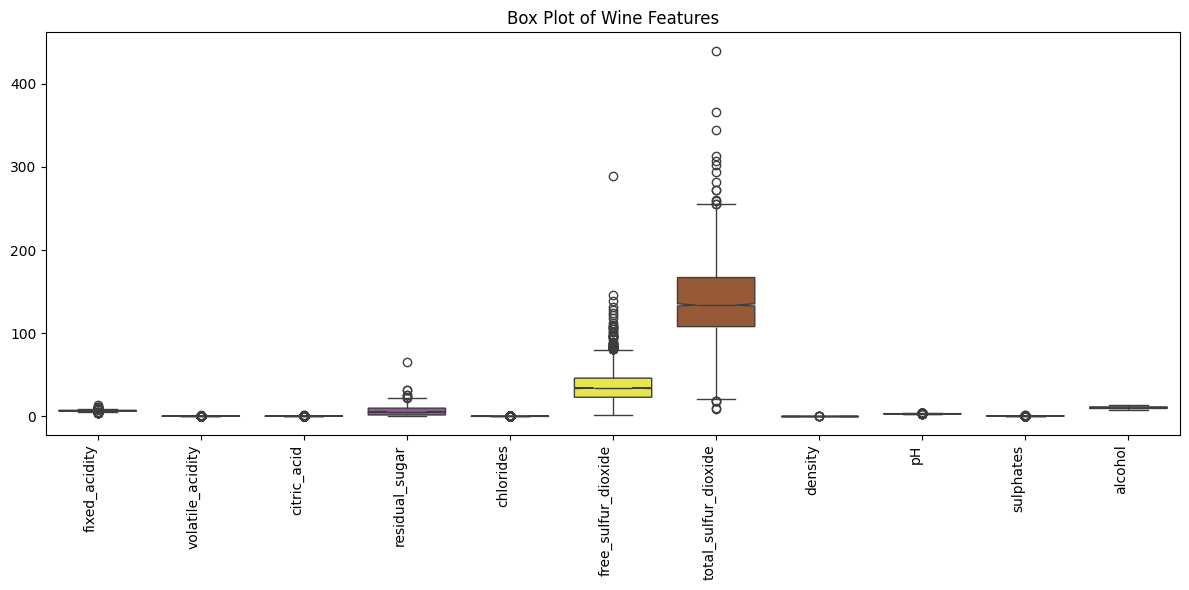

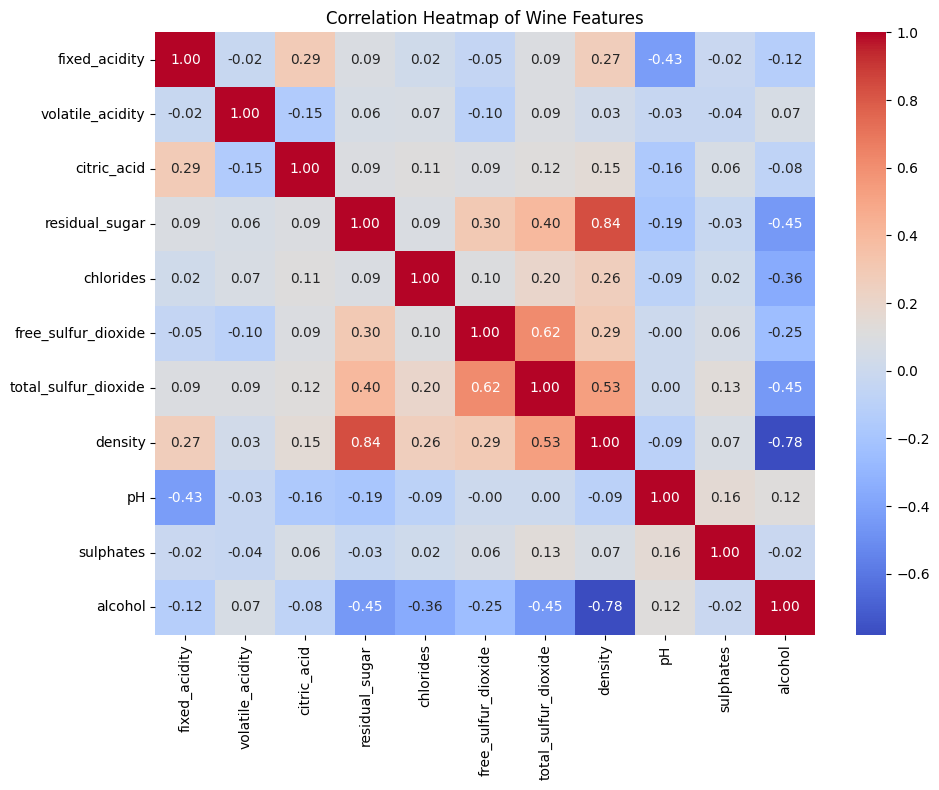

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'color' column from X as it is non-numeric and causes errors in correlation and boxplot
X_numeric = X.drop('color', axis=1, errors='ignore')

plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.boxplot(data=X_numeric, orient="v", palette="Set1", width=0.75, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') # Rotate and align labels for better readability
plt.title('Box Plot of Wine Features')
plt.tight_layout() # Adjust layout to prevent labels from overlapping

plt.figure(figsize=(10, 8))
corr = X_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Features')
plt.tight_layout() # Adjust layout
plt.show()

In [15]:
Y = [0 if val <=5 else 1 for val in Y]
print(f"Updated Y (first 10 elements): {Y[:10]}")

Updated Y (first 10 elements): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [13]:
import pandas as pd
import numpy as np

# The previous attempt to load the CSV from a direct link failed with an HTTP 404 error.
# This means the file is no longer available at that URL.
# Fortunately, the wine_quality dataset was already loaded using `ucimlrepo`,
# and it contains data for both red and white wines, including a 'color' column.
# We will filter this already loaded data to get only the white wine samples.

# Access the original full dataset (features, targets, and auxiliary variables like 'color')
# as provided by ucimlrepo.
df = wine_quality.data.original

# Filter the DataFrame to include only white wines
df = df[df['color'] == 'white']

print("\n========= Dataset summary (White Wine) ========= \n")
df.info()
print("\n========= A few first samples (White Wine) ========= \n")
print(df.head())


========= Dataset summary (White Wine) ========= 

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 1599 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 535.7+ KB

========= A 